**O que você vai descobrir com essa análise?**


1.   Relação dos clientes com o Supermercado 
2.   Formas de pagamento utilizadas no supermercado.
3.   Relação dos produtos com quantidades.
4.   Tipos de produto e suas vendas
5.   Produtos e suas classificações.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Importar o Dataset
# Identificando a quantidade de Linhas e Colunas 
df = pd.read_csv("market.csv")
print(df.shape)

(1000, 17)


In [ ]:
#Visualizando os Dados
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Limpeza de Dados
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Não Há valores Missing

In [ ]:
#Verificando informações do conjunto de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
# Verificando o número de linhas  e colunas
print("Dataset contains {} row and {} colums".format(df.shape[0], df.shape[1]))

Dataset contains 1000 row and 17 colums


Visualização

Contagem de gênero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


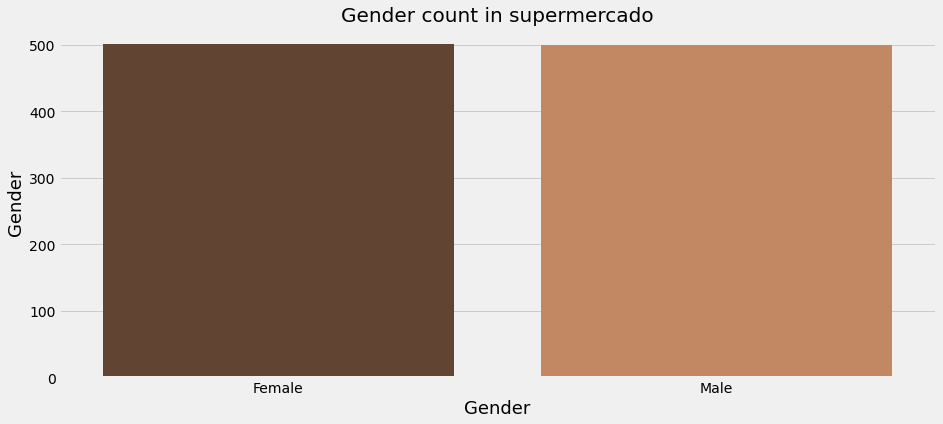

In [ ]:
# Contagem de gênero
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=df, palette = 'copper')
ax.set_xlabel(xlabel= "Gender", fontsize=18)
ax.set_ylabel(ylabel= "Gender", fontsize=18)
ax.set_title(label= "Gender count in supermercado", fontsize=20)
plt.show()

Analisando os dados podemos ver que o número de homens e mulheres é quase igual, mas parece suspeita, então vamos verificar os dados númericos. 

In [ ]:
df.groupby(['Gender']).agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


Tipo de Cliente

Text(0, 0.5, 'Customer Count')

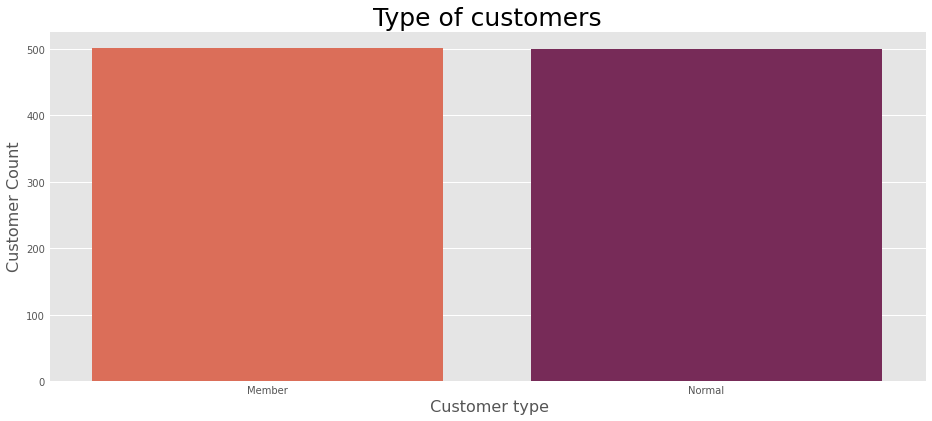

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (14,6))
ax = sns.countplot(x="Customer type", data=df, palette="rocket_r")
ax.set_title("Type of customers",fontsize= 25)
ax.set_xlabel(" Customer type", fontsize= 16)
ax.set_ylabel("Customer Count", fontsize= 16)

Parece suspeita, então vamos verificar os dados númericos. 

In [ ]:
df.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Acima, podemos ver o tipo de cliente em todas as agências combinadas, agora vamos verificar as diferentes agências 

Text(0, 0.5, 'Customer Count')

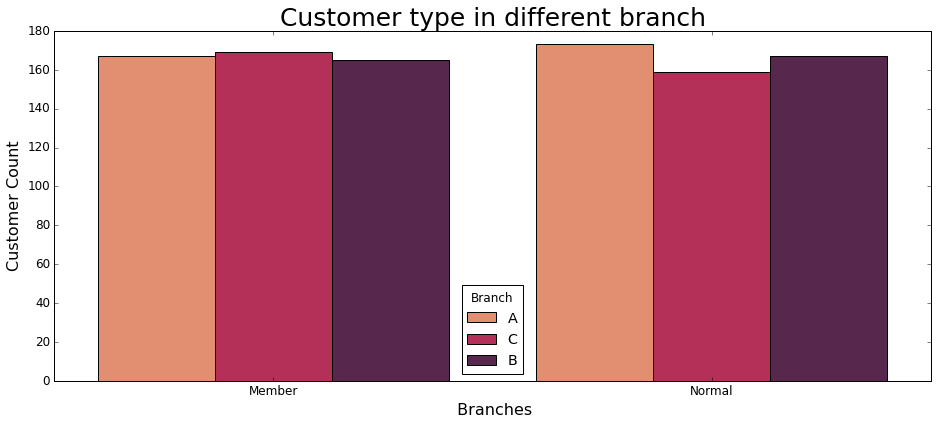

In [ ]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Customer type", hue= "Branch", data=df, palette="rocket_r")
ax.set_title("Customer type in different branch", fontsize= 25)
ax.set_xlabel(xlabel = " Branches", fontsize= 16)
ax.set_ylabel(ylabel ="Customer Count", fontsize= 16)

Verificar os diferentes métodos de pagamentos utilizados 

Text(0, 0.5, 'Customer Count')

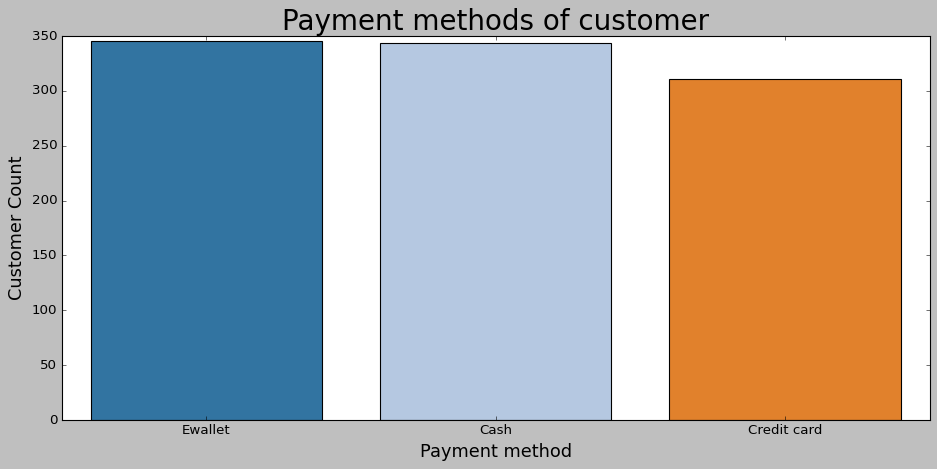

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x="Payment", data=df, palette="tab20")
ax.set_title(label= "Payment methods of customer", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize= 16)
ax.set_ylabel(ylabel ="Customer Count", fontsize= 16)

Distribuição da forma de pagamento em todas as agências

Text(0, 0.5, 'Customer Count')

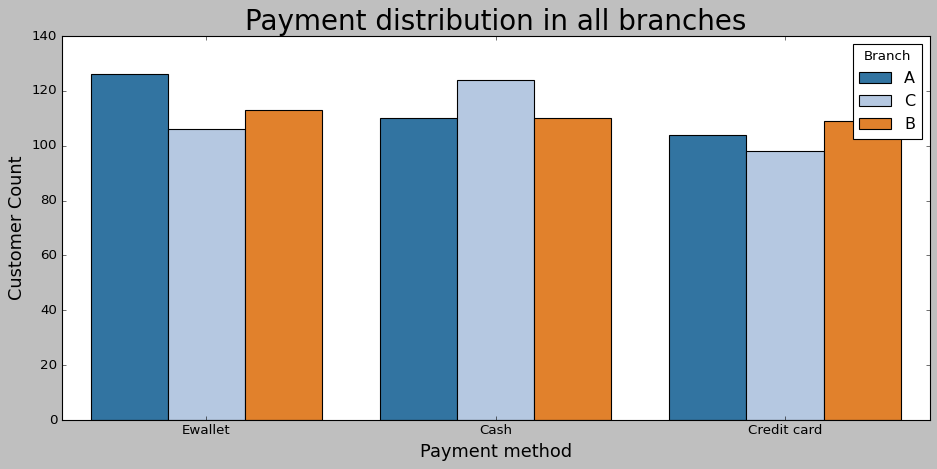

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x="Payment", hue= "Branch", data=df, palette="tab20")
ax.set_title("Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize= 16)
ax.set_ylabel(ylabel ="Customer Count", fontsize= 16)

Agora vamos ver a distribuição de rating em 3 ramos


Text(0, 0.5, 'Rating distribution')

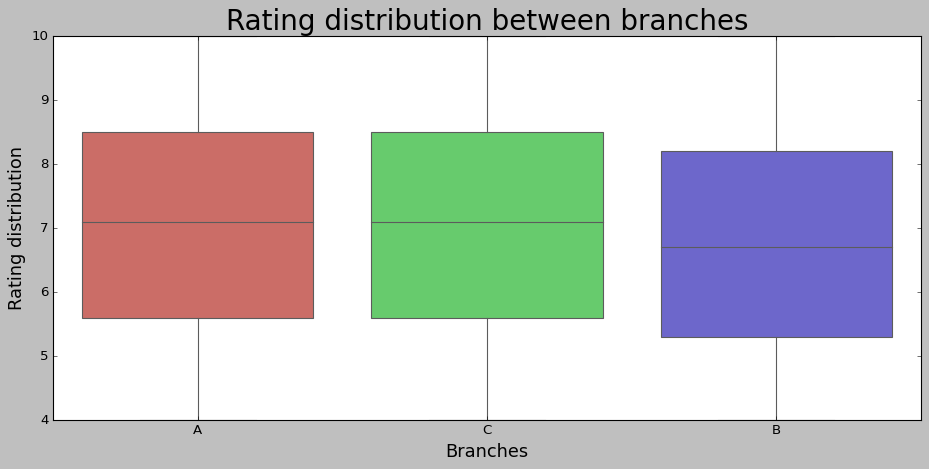

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.boxplot(x="Branch", y="Rating", data=df, palette= "hls")
ax.set_title("Rating distribution between branches", fontsize= 25)
ax.set_xlabel(xlabel = "Branches", fontsize= 16)
ax.set_ylabel(ylabel ="Rating distribution", fontsize= 16)

Vimos que a classificação média do ramo A e C é superior a setee e o ramo B é inferior a 7.

Tempo máximo de vendas

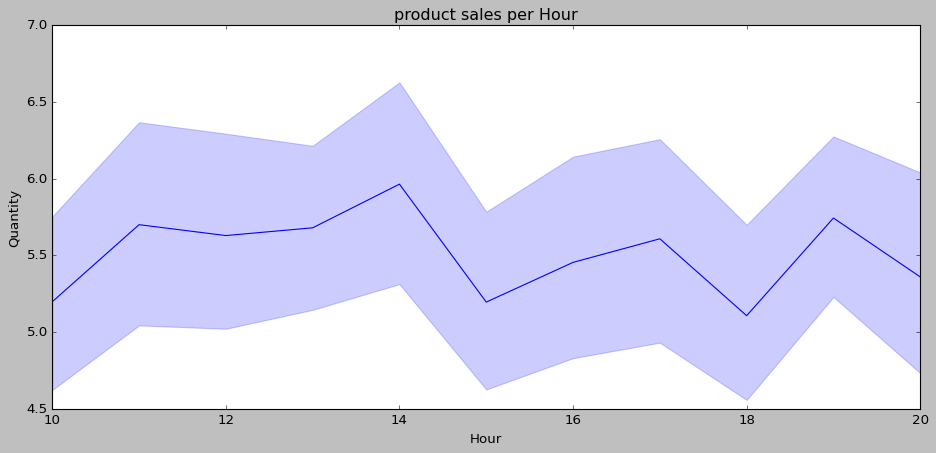

In [ ]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]=(df["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime= sns.lineplot(x="Hour", y="Quantity", data=df).set_title("product sales per Hour")

Podemos observar que o supermercado faz a maior parte de suas vendas as 14:00 horas.

Avaliação vs Vendas

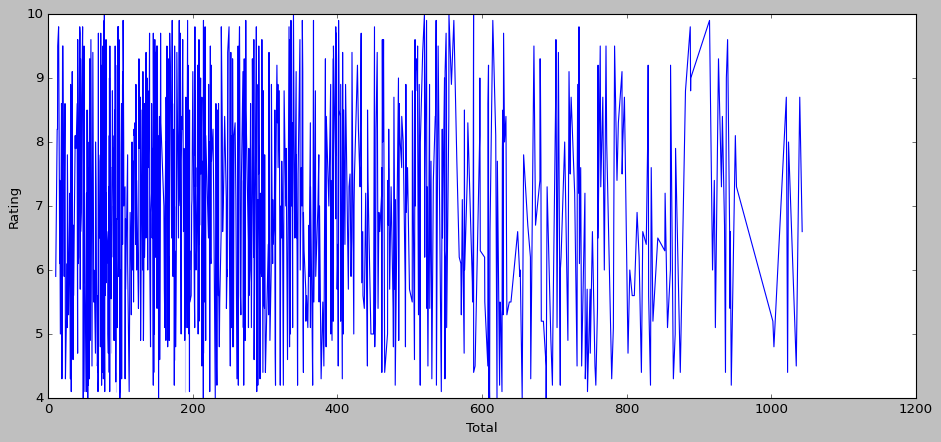

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
rating_vs_sales= sns.lineplot(x="Total", y="Rating", data=df)

Usando boxen plot

Text(0, 0.5, 'Product Line')

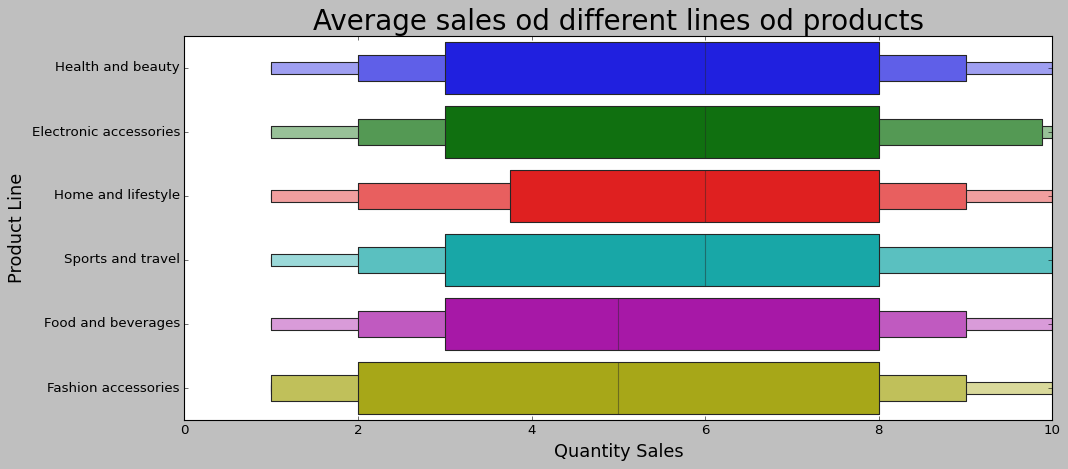

In [ ]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.boxenplot(x="Quantity", y= "Product line", data=df)
ax.set_title("Average sales od different lines od products", fontsize= 25)
ax.set_xlabel(xlabel = "Quantity Sales", fontsize= 16)
ax.set_ylabel(ylabel ="Product Line", fontsize= 16)

A Média de vendas das diferentes linhas de produtos, Saúde e beleza são as vendas mais altas, enquanto os acessórios Fashion são as vendas mais baixas.

Vamos ver a quantidade de vendas desses produtos

Text(0, 0.5, 'Product Line')

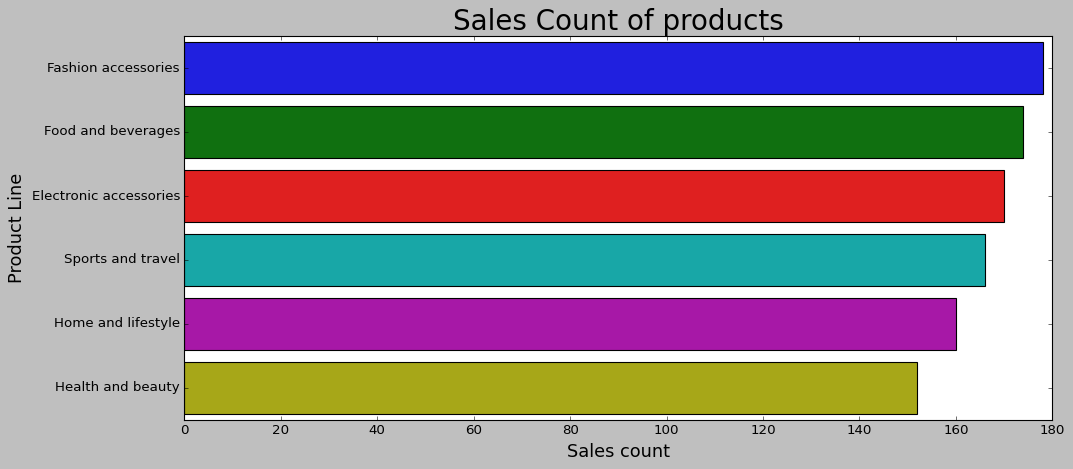

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.countplot(y= "Product line", data=df, order = df['Product line'].value_counts().index)
ax.set_title(label="Sales Count of products", fontsize= 25)
ax.set_xlabel(xlabel = "Sales count", fontsize= 16)
ax.set_ylabel(ylabel ="Product Line", fontsize= 16)

Podemos ver os produtos mais vendidos 

Agora vamos ver o total de vendas dos produtos usando boxenplot 

Text(0, 0.5, 'Product Line')

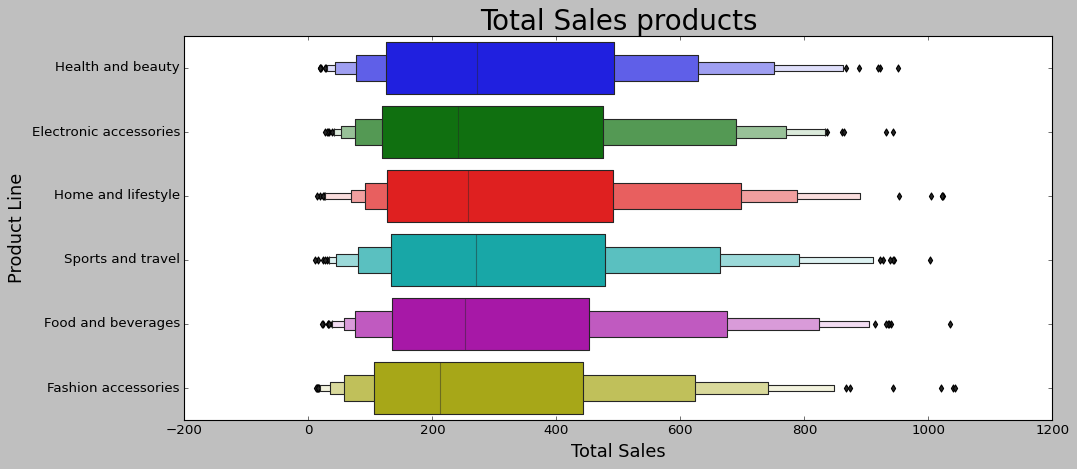

In [ ]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.boxenplot(y= "Product line", x="Total", data=df)
ax.set_title(label="Total Sales products", fontsize= 25)
ax.set_xlabel(xlabel = "Total Sales", fontsize= 16)
ax.set_ylabel(ylabel ="Product Line", fontsize= 16)

Agora vamos ver as classificações médias dos Produtos

Text(0, 0.5, 'Product Line')

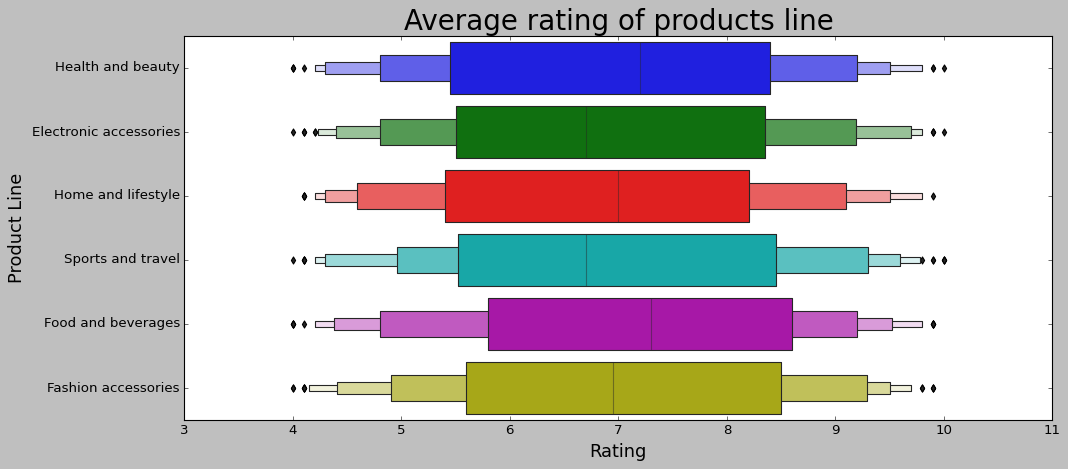

In [ ]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.boxenplot(y= "Product line", x="Rating", data=df)
ax.set_title(label="Average rating of products line", fontsize= 25)
ax.set_xlabel(xlabel = "Rating", fontsize= 16)
ax.set_ylabel(ylabel ="Product Line", fontsize= 16)

Vendas de produtos com base no gênero

Text(0, 0.5, 'Product Line')

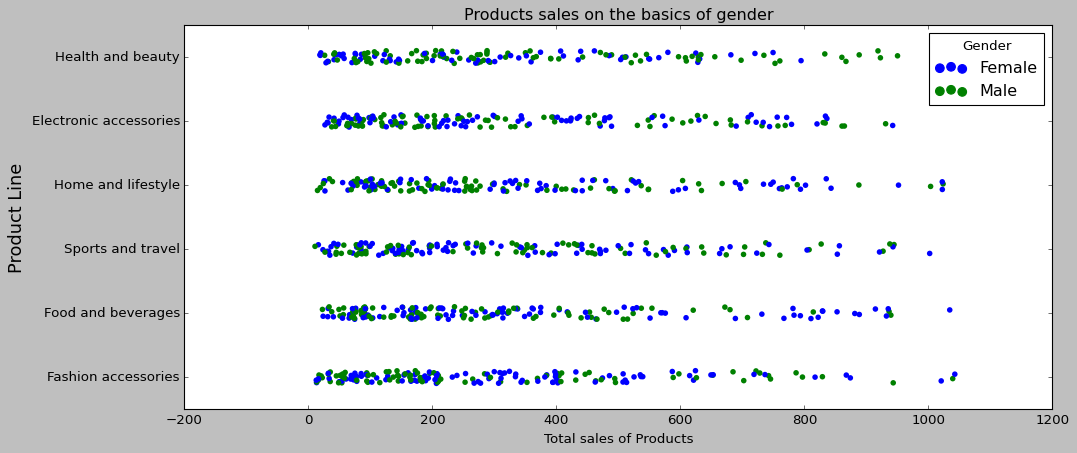

In [ ]:
plt.style.use('classic')
plt.figure(figsize = (14,6))
ax = sns.stripplot(y= "Product line", x="Total", hue = "Gender", data=df)
ax.set_title(label="Products sales on the basics of gender")
ax.set_xlabel(xlabel = "Total sales of Products")
ax.set_ylabel(ylabel ="Product Line", fontsize= 16)

Produto e Receita Bruta

<Figure size 1120x480 with 0 Axes>

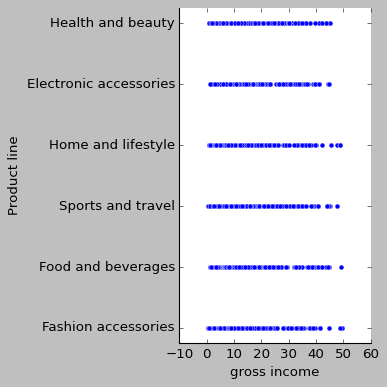

In [ ]:
plt.style.use('classic')
plt.figure(figsize = (14,6))
ax = sns.relplot(y= "Product line", x="gross income", data=df)